In [2]:
using Gadfly
using Interact

In this notebook, we compare the singular values from a matrix of real data from a genomics data set against a random model. The hypothesis we have is that the matrix of real data has a low rank deterministic component and a random component. How well is the random component described by the Marchenko-Pastur law?

# Reviewing the Marchenko-Pastur law

First, let's remind ourselves of how the Marchenko-Pastur law looks like.

It's conventionally presented as the distribution associated with eigenvalues of a covariance matrix $X X^T$ where $X$ is some data matrix. The nonzero eigenvalues of $X X^T$ have the density

$$
d\nu(x) = \frac{\sqrt{(\lambda_+ - x)(x - \lambda_-)}}{2\pi\lambda x}
$$

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"λ",1.0,0.0:0.2:2.0,true)

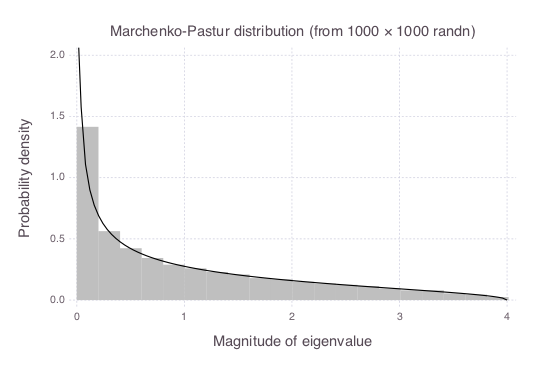

In [45]:
@manipulate for λ=0:0.2:2 #ratio of number of rows to number of columns
    if λ>1
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    else
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    Y = Symmetric(X*X')
    randdata = eigvals(Y);

    #Plot the analytic distribution
    λ₊ = (1+√λ)^2
    λ₋ = (1-√λ)^2
    dν(x) = √((λ₊-x)*(x-λ₋))/(2π*λ*x)

    plotgrid = linspace(λ₋, λ₊, 100)
    plotdν = map(dν, plotgrid)

    plot(
        Guide.title("Marchenko-Pastur distribution (from $nr × $nc randn)"),
        Guide.xlabel("Magnitude of eigenvalue"),
        Guide.ylabel("Probability density"),
        Coord.Cartesian(xmin=0),
        layer(Geom.line, x=plotgrid, y=plotdν,
            Theme(default_color=colorant"black")),
        layer(Geom.histogram(bincount=20, density=true), x=randdata,
            Theme(default_color=colorant"grey75")),
    )
end

## Marchenko-Pastur for the singular values

We can skip forming $X X^T$ by computing the singular values of $X$ instead.
Remember to transform the distribution accordingly.

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"λ",1.0,0.0:0.2:2.0,true)

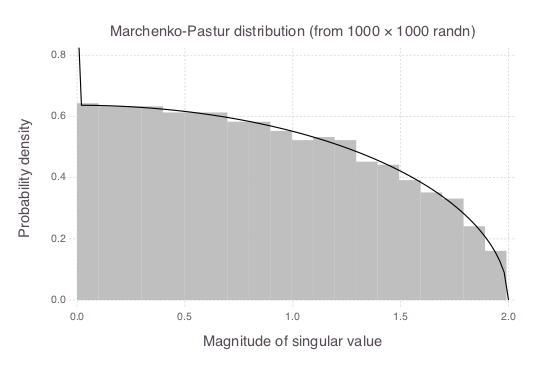

In [47]:
@manipulate for λ=0:0.2:2 #ratio of number of rows to number of columns
    if λ>1
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    else
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    #Y = Symmetric(X*X')
    randdata = svdvals(X);

    #Plot the analytic distribution
    λ₊ = (1+√λ)
    λ₋ = abs(1-√λ)
    dν(x) = √abs((λ₊^2-x^2)*(x^2-λ₋^2))/(π*min(λ,1)*x)

    plotgrid = linspace(λ₋, λ₊, 100)
    plotdν = map(dν, plotgrid)

    plot(
        Guide.title("Marchenko-Pastur distribution (from $nr × $nc randn)"),
        Guide.xlabel("Magnitude of singular value"),
        Guide.ylabel("Probability density"),
        Coord.Cartesian(xmin=0),
        layer(Geom.line, x=plotgrid, y=plotdν,
            Theme(default_color=colorant"black")),
        layer(Geom.histogram(bincount=20, density=true), x=randdata,
            Theme(default_color=colorant"grey75")),
    )
end

## Marchenko-Pastur as the scree plot

What does Marchenko-Pastur look like when you compute it as a scree plot (singular value vs index)? The y value is the magnitude of the singular value; the x value is the quantile.

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"λ",1.0,0.0:0.2:2.0,true)

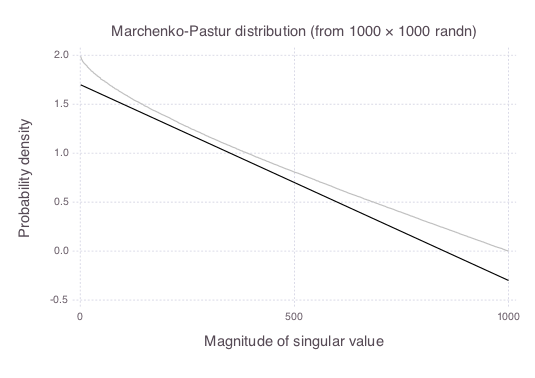

In [32]:
@manipulate for λ=0:0.2:2 #ratio of number of rows to number of columns
    if λ>1
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    else
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    randdata = svdvals(X);

    #Plot the analytic distribution
    dν(x) = 1.7-0.002x
    
    plotgrid = linspace(1, length(randdata), 2)
    plotdν = map(dν, plotgrid)

    plot(
        Guide.title("Marchenko-Pastur distribution (from $nr × $nc randn)"),
        Guide.xlabel("Magnitude of singular value"),
        Guide.ylabel("Probability density"),
        Coord.Cartesian(xmin=0),
        layer(Geom.line, x=plotgrid, y=plotdν,
            Theme(default_color=colorant"black")),
        layer(Geom.line, x=1:length(randdata), y=randdata,
            Theme(default_color=colorant"grey75")),
    )
end

In [ ]:
Y=Symmetric(X*X')
eigvals(Y)

In [33]:
realdata = readdlm("/Users/jiahao/papers/copper-mt-2016/fig/scree/values.txt")
n = length(realdata)

41505

In [38]:
#Andreas tried some random model but it appears to be a systematic underestimate
andreasranddata = readdlm("/Users/jiahao/papers/copper-mt-2016/fig/scree/randvalues.txt");

In [39]:
#Try to estimate the correct parameters for the Marčenko-Pastur law
ratio = 0.5
nr = 1000
nc = round(Int, ratio*nr)
X = randn(nr, nc)
randdata = svdvals(X);

Interact.Slider{Float64}(Signal{Float64}(12.5, nactions=0),"σ²",12.5,10.0:0.1:15.0,true)

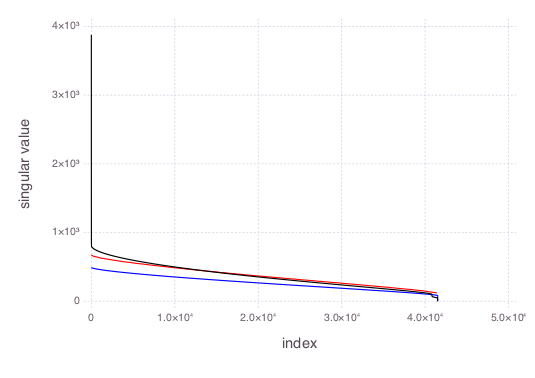

In [40]:
using Interact
@manipulate for σ²=10:0.1:15
    plot(
Guide.ylabel("singular value"),
Guide.xlabel("index"),
layer(x=1:n, y=realdata,
    Geom.line, Theme(default_color=colorant"black")),
layer(x=1:n, y=andreasranddata,
    Geom.line, Theme(default_color=colorant"blue")),
layer(x=1.0:n/length(randdata):n, y=σ²*randdata,
    Geom.line, Theme(default_color=colorant"red")),
)
end

Interact.Slider{Float64}(Signal{Float64}(10.5, nactions=0),"σ²",10.5,10.0:0.1:11.0,true)

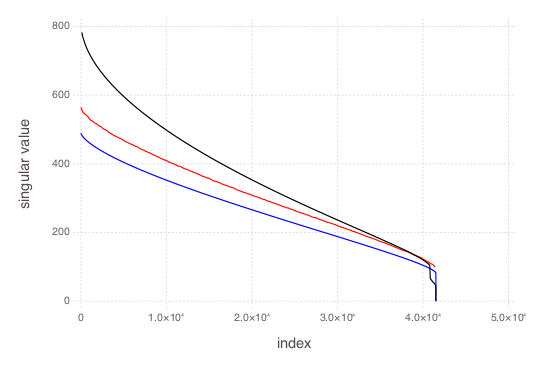

In [41]:
using Interact
@manipulate for σ²=10.0:0.1:11.0
    plot(
Guide.ylabel("singular value"),
Guide.xlabel("index"),
    layer(x=100:n, y=realdata[100:end],
    Geom.line, Theme(default_color=colorant"black")),
layer(x=1:n, y=andreasranddata,
    Geom.line, Theme(default_color=colorant"blue")),
layer(x=1.0:n/length(randdata):n, y=σ²*randdata,
    Geom.line, Theme(default_color=colorant"red")),
)
end

Interact.Slider{Float64}(Signal{Float64}(12.0, nactions=0),"σ²",12.0,11.0:0.1:13.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.6, nactions=0),"ratio",0.6,0.5:0.02:0.7,true)

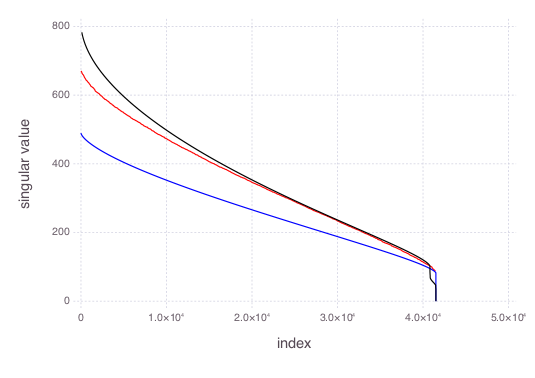

In [42]:
using Interact
@manipulate for σ²=11:0.1:13, ratio=0.5:0.02:0.7
nr = 1000
nc = round(Int, ratio*nr)
X = randn(nr, nc)
randdata = svdvals(X);
    
    plot(
Guide.ylabel("singular value"),
Guide.xlabel("index"),
    layer(x=100:n, y=realdata[100:end],
    Geom.line, Theme(default_color=colorant"black")),
layer(x=1:n, y=andreasranddata,
    Geom.line, Theme(default_color=colorant"blue")),
layer(x=1.0:n/length(randdata):n, y=σ²*randdata,
    Geom.line, Theme(default_color=colorant"red")),
)
end
#var = 12, ratio = 0.58

In [ ]:
#The last thing we need to do is figure out
#How does largest singular value scale with matrix size?

ns = [100:100:1000;]
svdmax = Float64[]
for nr in ns
    ratio = 0.5
    nc = round(Int, ratio*nr)
    X = randn(nr, nc)/(√(nr*√8))
    sig = svdvals(X)[1]
    info("$nr: $sig")
    push!(svdmax, sig)
end

plot(
    Guide.ylabel("singular value"),
Guide.xlabel("N"),# Scale.y_log10,
    x=ns, y=svdmax, Geom.point
)

In [44]:
var = 12*√(1000/81700)

1.327609091424431

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"n",25,1:50,true)

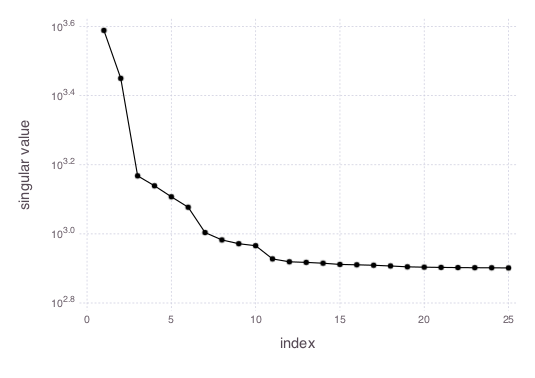

In [57]:
#How many low rank components do we have?

@manipulate for n=1:50
    plot(
    Guide.ylabel("singular value"),
    Guide.xlabel("index"),
    Scale.y_log10,
        layer(x=1:n, y=realdata[1:n],
    Geom.line, Geom.point,
    Theme(default_color=colorant"black")),
    )
end

# Plotting all the various parts of the scree plot

In [108]:
#How many low rank components do we have?
n=length(realdata)
draw(PDF("scree.pdf", 8inch, 6inch),
    plot(
    Guide.ylabel("singular value"),
    Guide.xlabel("index"),
        layer(x=1:n, y=realdata[1:n],
    Geom.line,
    Theme(default_color=colorant"black")),
    )
)

In [58]:
#How many low rank components do we have?
n=20
draw(PDF("scree20.pdf", 8inch, 6inch),
    plot(
    Guide.ylabel(""),
    Guide.xlabel(""),
    Scale.y_log10,
        layer(x=1:n, y=realdata[1:n],
    Geom.line, Geom.point,
    Theme(default_color=colorant"black")),
    )
)

In [86]:
#Plot everything else
n=11
σ²= 12
λ = 0.58
nr = 1000
nc = round(Int, λ*nr)
X = randn(nr, nc)
randdata = svdvals(X);

draw(PDF("scree-rest.pdf", 8inch, 6inch),
    plot(
    Guide.ylabel(""),
    Guide.xlabel(""),
    Scale.y_log10,
    Coord.Cartesian(ymin=1.5, xmax=41700),
    layer(x=n:length(realdata), y=realdata[n:end],
    Geom.line,
    Theme(default_color=colorant"black", grid_color=nothing)
    ),
    layer(x=linspace(1,length(realdata), min(nc, nr)), y=σ²*randdata,
        Geom.line,
    Theme(default_color=colorant"red",
        line_style=([0.5mm, 0.5mm]))

    )
    )
)

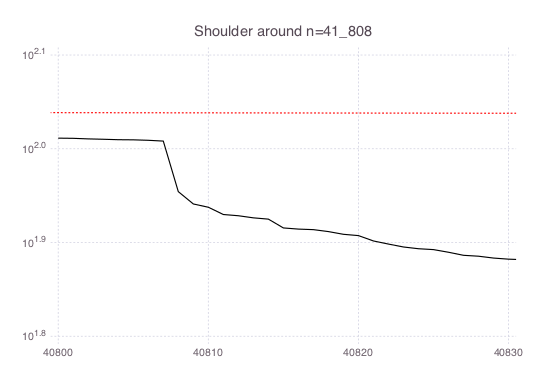

In [105]:
#Plot everything else
n=40_800
σ²= 12
λ = 0.58
nr = 1000
nc = round(Int, λ*nr)
X = randn(nr, nc)
randdata = svdvals(X);

#draw(PDF("scree-rest.pdf", 8inch, 6inch),
    plot(
Guide.title("Shoulder around n=41_808"),
    Guide.ylabel(""),
    Guide.xlabel(""),
    Scale.y_log10,
    Coord.Cartesian(ymin=1.8, ymax=2.1, xmin=n, xmax=40_830),
    layer(x=n:length(realdata), y=realdata[n:end],
    Geom.line,
    Theme(default_color=colorant"black", grid_color=nothing)
    ),
    layer(x=linspace(1,length(realdata), min(nc, nr)), y=σ²*randdata,
Geom.line, Geom.point,
    Theme(default_color=colorant"red",
        line_style=([0.5mm, 0.5mm]))

    )
    )
#)